In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('data/cs-training.csv', index_col = 0)

In [125]:
df.columns = ['more90_2yrs', 'rev_util', 'age', 'num_30-59_due', 'debt_ratio', 'month_income', 'num_cre_loan', 'num_90late', 'num_REL', 'num_60-89_due', 'num_dependents']
df

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [126]:
df.describe()

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [127]:
df.isna().sum()

more90_2yrs           0
rev_util              0
age                   0
num_30-59_due         0
debt_ratio            0
month_income      29731
num_cre_loan          0
num_90late            0
num_REL               0
num_60-89_due         0
num_dependents     3924
dtype: int64

In [128]:
df.fillna(0, inplace = True)

In [129]:
df.isnull().sum()

more90_2yrs       0
rev_util          0
age               0
num_30-59_due     0
debt_ratio        0
month_income      0
num_cre_loan      0
num_90late        0
num_REL           0
num_60-89_due     0
num_dependents    0
dtype: int64

# 나이

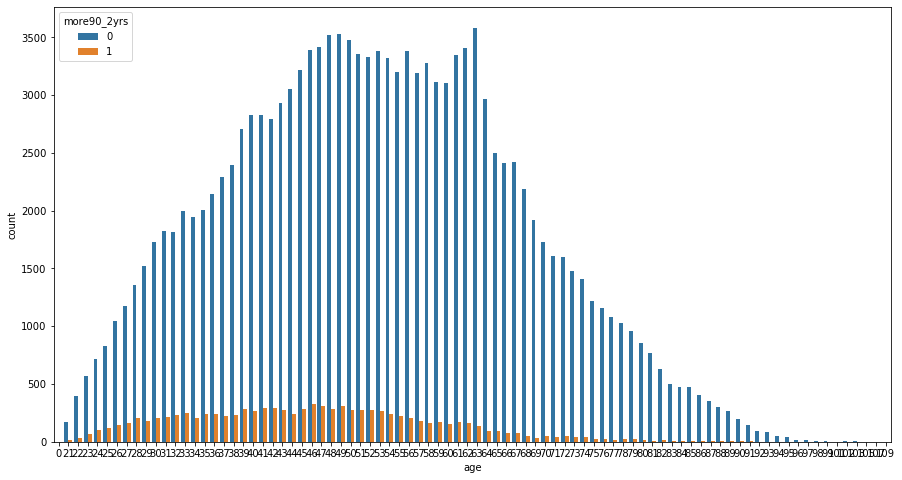

In [130]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = 'age', hue = 'more90_2yrs')

# 전체 운용가능한 돈 대비 현재 운용가능한 돈의 비율 & 나이

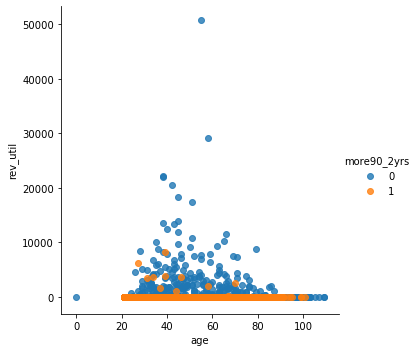

In [131]:
sns.lmplot(data = df, x = 'age', y = 'rev_util', hue = 'more90_2yrs', fit_reg = False)

In [132]:
lower_age_rev_util = df[(df['age']<80) & (df['rev_util']<2)]

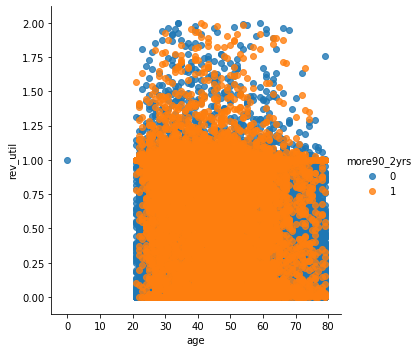

In [133]:
sns.lmplot(data = lower_age_rev_util, x = 'age', y = 'rev_util', hue = 'more90_2yrs', fit_reg = False)

In [134]:
df[df['rev_util']<1.25].sum()

more90_2yrs       9.713000e+03
rev_util          4.709593e+04
age               7.802290e+06
num_30-59_due     6.244800e+04
debt_ratio        5.266545e+07
month_income      7.978888e+08
num_cre_loan      1.262717e+06
num_90late        3.909800e+04
num_REL           1.521150e+05
num_60-89_due     3.561500e+04
num_dependents    1.098520e+05
dtype: float64

In [135]:
# age 20~70
# rev_util < 1.25

In [136]:
df.loc[df['age']==0, 'rev_util'] = 0
df.loc[df['age']==0]

,more90_2yrs,rev_util,age,num_30-59_due,debt_ratio,month_income,num_cre_loan,num_90late,num_REL,num_60-89_due,num_dependents
65696,0,0.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [137]:
age_working = df.loc[(df['age']> 20) & (df['age'] < 65)]
age_older = df.loc[df['age']>= 65]

age_working_impute = age_working.rev_util.mean()
age_older_impute = age_older.rev_util.mean()

In [138]:
age_working['rev_util'] = age_working_impute
age_working['rev_util'] 

C:\Users\amelie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1         6.611791
2         6.611791
3         6.611791
4         6.611791
5         6.611791
            ...   
149995    6.611791
149997    6.611791
149998    6.611791
149999    6.611791
150000    6.611791
Name: rev_util, Length: 118806, dtype: float64

In [139]:
age_older['rev_util'] = age_older_impute
age_older['rev_util']

C:\Users\amelie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6         3.902935
15        3.902935
17        3.902935
28        3.902935
38        3.902935
            ...   
149972    3.902935
149977    3.902935
149984    3.902935
149985    3.902935
149996    3.902935
Name: rev_util, Length: 31193, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['more90_2yrs'])
y = df.more90_2yrs
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [163]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112500, 10), (37500, 10), (112500,), (37500,))

## 랜덤포레스트

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\amelie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [145]:
def print_metrics(y, pred, title = None):
    acc = accuracy_score(y,pred)
    recall = recall_score(y,pred)
    precision = precision_score(y,pred)
    f1 = f1_score(y,pred)
    
    if title:
        print('title')
    print(f'정확도:{acc}, 재현율:{recall}, 정밀도:{precision}, f1:{f1}')

In [146]:
pred_rf = rf.predict(X_test)
print_metrics(y_test, pred_rf, 'RF-test')

title
정확도:0.9339733333333333, 재현율:0.1814918228958915, 정밀도:0.5176336746302617, f1:0.2687536916715889


## AUC 확인

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [148]:
pred_rf_proba = rf.predict_proba(X_test)
pred_rf_proba.shape

(37500, 2)

In [149]:
auc = roc_auc_score(y_test, pred_rf_proba[:,1])

In [150]:
auc

0.790376486602808

# month_income & debt_ration

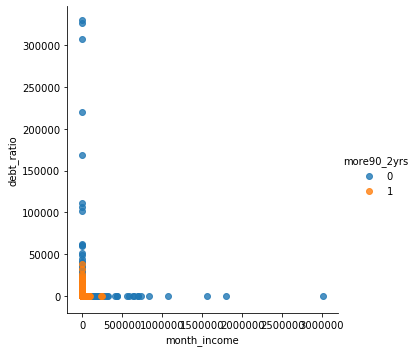

In [151]:
sns.lmplot(data = df, x = 'month_income', y = 'debt_ratio', hue = 'more90_2yrs', fit_reg = False)

In [152]:
lower_debt_income = df[(df['debt_ratio']<11500) & (df['month_income']<70000)]

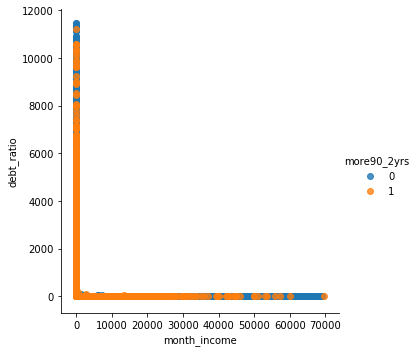

In [153]:
sns.lmplot(data = lower_debt_income, x = 'month_income', y = 'debt_ratio', hue = 'more90_2yrs', fit_reg = False)

In [154]:
df[(df['debt_ratio']<12500) & (df['month_income']<75000)].sum()

more90_2yrs       1.000800e+04
rev_util          8.988668e+05
age               7.830824e+06
num_30-59_due     6.307500e+04
debt_ratio        4.925663e+07
month_income      7.731221e+08
num_cre_loan      1.264880e+06
num_90late        3.988400e+04
num_REL           1.520140e+05
num_60-89_due     3.604400e+04
num_dependents    1.104170e+05
dtype: float64

In [155]:
df[[(df['debt_ratio']<12500) & (df['month_income']<75000)]==]


SyntaxError: invalid syntax (<ipython-input-155-0809a60997f4>, line 1)

In [ ]:
# debt_ratio 

In [ ]:
df[(df['num_30-59_due'] > 0) & (df['num_60-89_due'] > 0)].value